In [71]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import ast
import re
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
from scipy import stats
from scipy.stats import t
import numpy as np
import pandas as pd
from itertools import combinations
from functions import *

In [72]:
def calcAcc(D1):
    
    D1['number_of_letters'] = D1['correctSequence'].apply(lambda x: len(x))
    # D1[D1['number_of_letters']==3]
    accuracies = []
    for idx,row in D1.iterrows():
        accuracies.append(np.intersect1d(row['correctSequence'], row['userInput']).size / len(row['correctSequence']))
    D1['accuracies'] = np.array(accuracies)

In [73]:
D1 = loadDataFrame("Ali\eksperiment1.csv")
D2 = loadDataFrame("Carl\eksperiment1.csv")
D3 = loadDataFrame("Erik\eksperiment1.csv")
D4 = loadDataFrame("Kasper\eksperiment1.csv")

df = pd.concat([D1,D2,D3,D4], ignore_index=True)
calcAcc(df)
df

,wait,correctSequence,userInput,number_of_letters,accuracies
0,0.5,"[47, 19, 81, 42, 27, 86, 40, 92, 58, 49, 56, 9...","[25, 23, 81, 47, 49, 27, 33, 81, 85, 94, 34, 1...",20,0.40
1,0.5,"[51, 64, 75, 80, 25, 27, 72, 28, 59, 97, 85, 7...","[14, 45, 49, 88, 75, 70, 14, 28, 56, 34, 67, 3...",20,0.30
2,0.5,"[76, 14, 60, 88, 37, 77, 90, 64, 99, 89, 72, 8...","[41, 70, 76, 14, 60, 76, 34, 21, 54, 76, 94, 2...",20,0.30
3,0.5,"[94, 61, 50, 95, 80, 49, 64, 23, 99, 24, 66, 1...","[37, 35, 94, 95, 91, 90, 64, 61, 65, 35, 83, 2...",20,0.40
4,1.0,"[67, 96, 28, 95, 42, 73, 74, 83, 66, 82, 20, 4...","[52, 33, 96, 97, 86, 82, 72, 71, 45, 56, 23, 9...",20,0.25
...,...,...,...,...,...
133,4.0,"[69, 33, 14, 64, 20, 56, 82, 39, 31, 66, 51, 7...","[18, 28, 43, 12, 13, 14, 15, 81, 99, 93, 88, 3...",20,0.45
134,4.0,"[70, 49, 72, 84, 33, 68, 28, 46, 10, 37, 60, 9...","[70, 60, 26, 90, 23, 43, 37, 93, 47, 73, 10, 6...",20,0.35
135,4.0,"[26, 79, 81, 37, 57, 20, 76, 55, 96, 45, 18, 4...","[24, 12, 95, 96, 12, 50, 51, 53, 26, 25, 55]",20,0.30
136,4.0,"[73, 82, 57, 21, 77, 99, 58, 50, 68, 20, 30, 8...","[37, 47, 77, 86, 87, 82, 91, 99, 20, 30, 73, 4...",20,0.55


In [74]:

model = smf.ols('accuracies ~ wait', data=df).fit()
model.f_pvalue

np.float64(0.00013876864927117266)

In [75]:
dfMeans = df.groupby('wait')[[ 'accuracies']].mean()


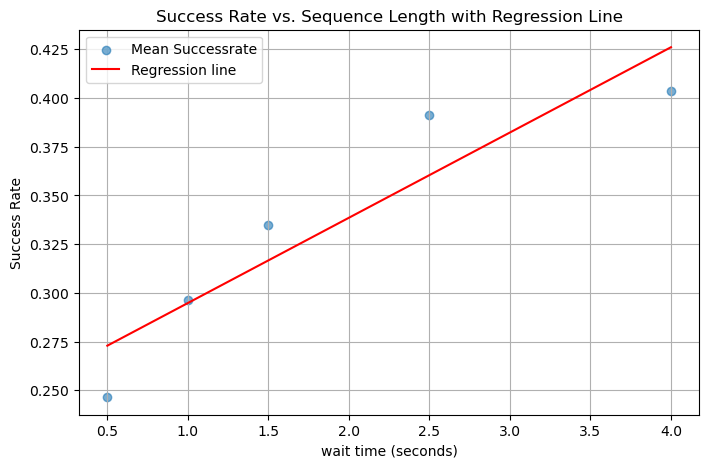

In [76]:
x_vals = np.linspace(df['wait'].min(), df['wait'].max(), 50)
y_vals = model.predict(pd.DataFrame({'wait': x_vals}))# Plot with regression line
plt.figure(figsize=(8, 5))

plt.scatter(dfMeans.index, dfMeans['accuracies'], alpha=0.6, label='Mean Successrate')
plt.plot(x_vals, y_vals, color='red', label='Regression line')
plt.xlabel("wait time (seconds)")
plt.ylabel("Success Rate")
plt.title("Success Rate vs. Sequence Length with Regression Line")
plt.legend()
plt.grid(True)
plt.show()